# Predictive Analysis of GPA-5 Achievers in SSC Exams (Bangladesh)

Date: July 21, 2025    
Prepared by:  Kumari Shivangi

**Introduction**

This project explores the application of machine learning to predict the number of students achieving a GPA-5 score in Bangladesh’s SSC examination. The objective is to evaluate multiple regression models on historical exam data spanning from 2001 to 2025. By identifying the most accurate predictive model, we aim to assist educational stakeholders in better understanding student performance trends.

**Key columns**

Year: Exam year (ranging from 2001 to 2025)

Total_Examinees: Number of students who appeared

Pass_Rate: Percentage of students who passed

GPA_5_Count: Number of students who scored GPA 5 (highest score)

# Data Preprocessing

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [60]:
df = pd.read_csv('/content/SSC Result Trends in Bangladesh (20012025).csv')

In [61]:
df.head(10)

,Year,Total_Examinees,Pass_Rate,GPA_5_Count
0,2001,Null,35.22%,76
1,2002,"7,84,815",42.18%,327
2,2003,"921,024",36.85%,"1,389"
3,2004,"756,387",50.27%,"8,597"
4,2005,"944,015",54.10%,"15,631"
5,2006,"10,00,564",62.22%,"24,384"
6,2007,"1,024,537",57.37%,"25,732"
7,2008,"1,013,301",72.18%,"41,917"
8,2009,"1,420,057",67.41%,"45,934"
9,2010,"1,206,019",78.19%,"52,134"


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             25 non-null     int64 
 1   Total_Examinees  25 non-null     object
 2   Pass_Rate        25 non-null     object
 3   GPA_5_Count      25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


*The dataset had 25 rows (years) and 4 main columns.*

In [63]:
# Replace the string "Null" with actual NaN
df.replace("Null", np.nan, inplace=True)

In [64]:
df['Total_Examinees'] = df['Total_Examinees'].str.replace(',', '', regex=False)
df['GPA_5_Count'] = df['GPA_5_Count'].str.replace(',', '', regex=False)
df['Pass_Rate'] = df['Pass_Rate'].str.replace('%', '', regex=False)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             25 non-null     int64 
 1   Total_Examinees  24 non-null     object
 2   Pass_Rate        25 non-null     object
 3   GPA_5_Count      25 non-null     object
dtypes: int64(1), object(3)
memory usage: 932.0+ bytes


In [66]:
# Use errors='coerce' to handle unexpected values gracefully
df['Total_Examinees'] = pd.to_numeric(df['Total_Examinees'], errors='coerce').astype('Int64')
df['GPA_5_Count'] = pd.to_numeric(df['GPA_5_Count'], errors='coerce').astype('Int64')
df['Pass_Rate'] = pd.to_numeric(df['Pass_Rate'], errors='coerce')  # Keep as float

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             25 non-null     int64  
 1   Total_Examinees  24 non-null     Int64  
 2   Pass_Rate        25 non-null     float64
 3   GPA_5_Count      25 non-null     Int64  
dtypes: Int64(2), float64(1), int64(1)
memory usage: 982.0 bytes


In [68]:
df.describe()

,Year,Total_Examinees,Pass_Rate,GPA_5_Count
count,25.000000,24.0,25.000000,25.0
mean,2013.000000,1490229.125,72.655200,89213.92
std,7.359801,469630.020129,17.474546,70204.741308
min,2001.000000,756387.0,35.220000,76.0
25%,2007.000000,1021728.0,62.220000,25732.0
50%,2013.000000,1423490.0,80.350000,91226.0
75%,2019.000000,2024192.0,86.320000,135898.0
max,2025.000000,2187815.0,93.580000,269602.0


GPA_5_Count mean: ~89,214

Min GPA 5 achievers: 76 (in 2001)

Max GPA 5 achievers: 269,602 (in 2023 or 2025) *italicized text*

In [69]:
df['Total_Examinees'] = pd.to_numeric(df['Total_Examinees'], errors='coerce')
mean_val = round(df['Total_Examinees'].mean())  # round the float mean to integer
df['Total_Examinees'].fillna(mean_val, inplace=True)


In [70]:
print(df.dtypes)
print("__________________________________")
print(df.isnull().sum())


Year                 int64
Total_Examinees      Int64
Pass_Rate          float64
GPA_5_Count          Int64
dtype: object
__________________________________
Year               0
Total_Examinees    0
Pass_Rate          0
GPA_5_Count        0
dtype: int64


In [71]:
df.duplicated().sum()

np.int64(0)

In [72]:
df.head()

,Year,Total_Examinees,Pass_Rate,GPA_5_Count
0,2001,1490229,35.22,76
1,2002,784815,42.18,327
2,2003,921024,36.85,1389
3,2004,756387,50.27,8597
4,2005,944015,54.10,15631


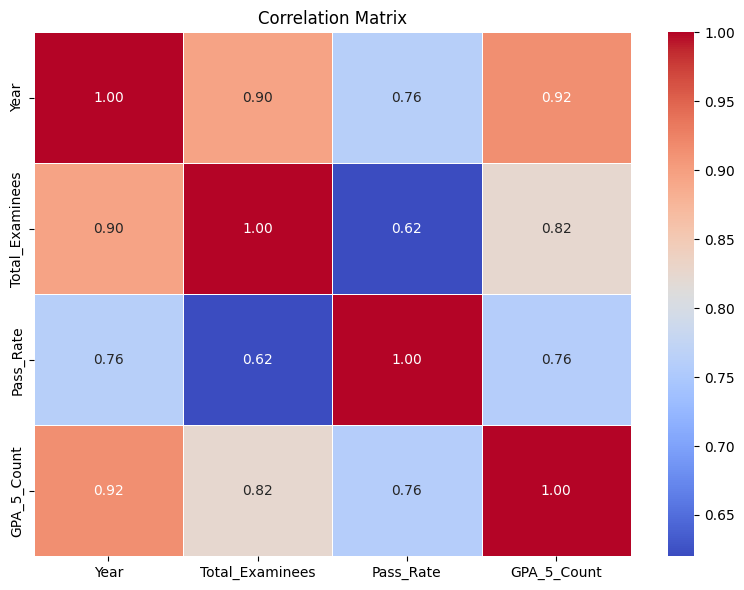

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


The correlation matrix showed:

GPA_5_Count ↔ Year: 0.92

GPA_5_Count ↔ Total_Examinees: Moderate correlation

GPA_5_Count ↔ Pass_Rate: Weak to moderate correlation

Since GPA_5_Count has strong correlation with Year (0.92) and is a key success metric, it's a great target for prediction.

In [107]:
# Let's say df is your dataframe and you want to check outliers in GPA_5_Count
Q1 = df['GPA_5_Count'].quantile(0.25)
Q3 = df['GPA_5_Count'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['GPA_5_Count'] < lower_bound) | (df['GPA_5_Count'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
 Empty DataFrame
Columns: [Year, Total_Examinees, Pass_Rate, GPA_5_Count, Total_Examinees_scaled]
Index: []


No significant outliers were present. This suggests that the data is well-behaved and follows a consistent distribution across all records. As a result, no outlier removal or transformation was necessary during preprocessing.

# Data Visualization

**Line Plot – Total Examinees Over Years**

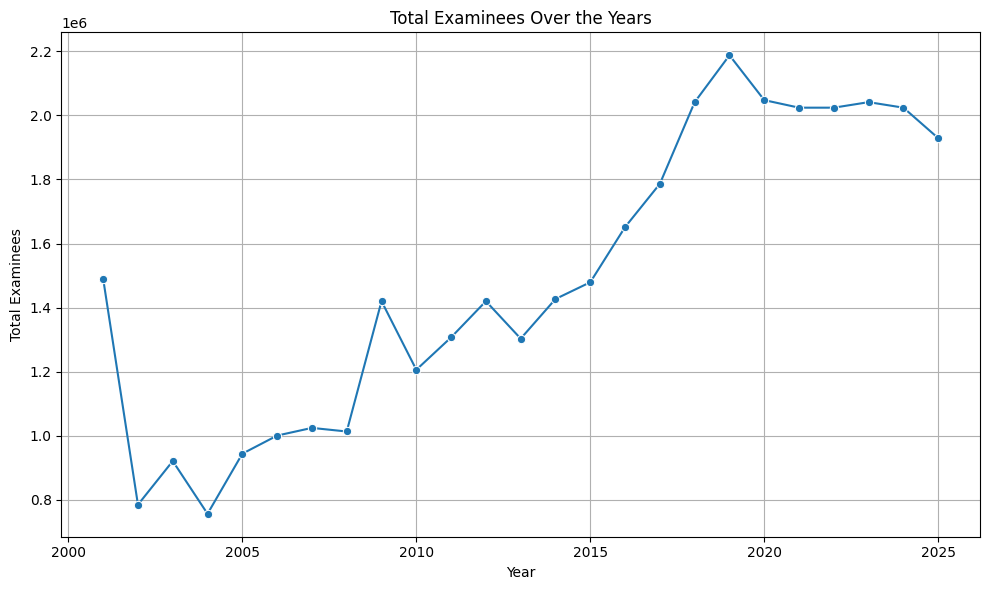

In [75]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total_Examinees', data=df, marker='o')
plt.title('Total Examinees Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Examinees')
plt.grid(True)
plt.tight_layout()
plt.show()


Bar Plot – GPA 5 Count Over the Years

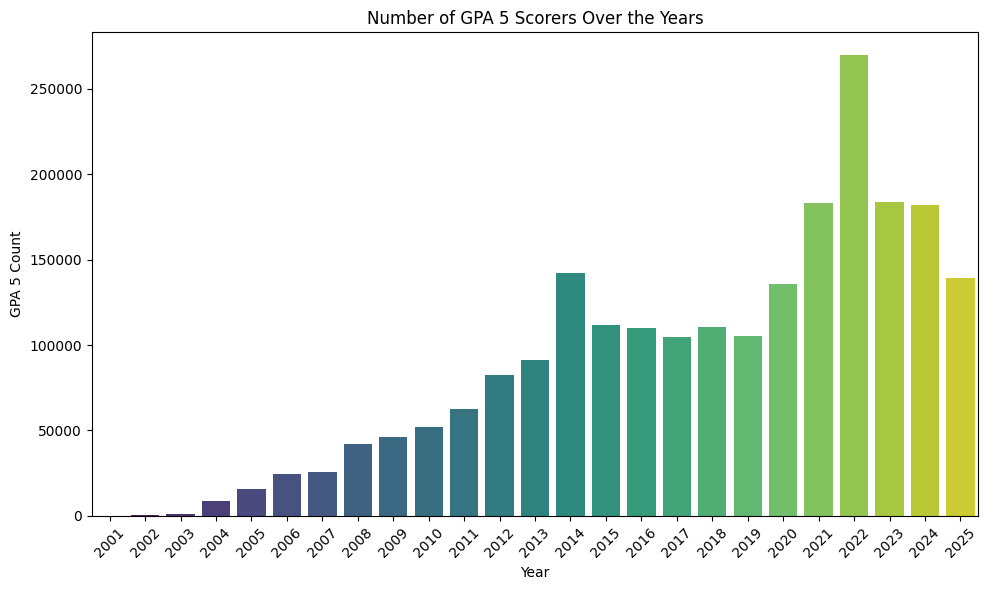

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='GPA_5_Count', data=df, palette='viridis')
plt.title('Number of GPA 5 Scorers Over the Years')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('GPA 5 Count')
plt.tight_layout()
plt.show()


 Line Plot – Pass Rate Over the Years

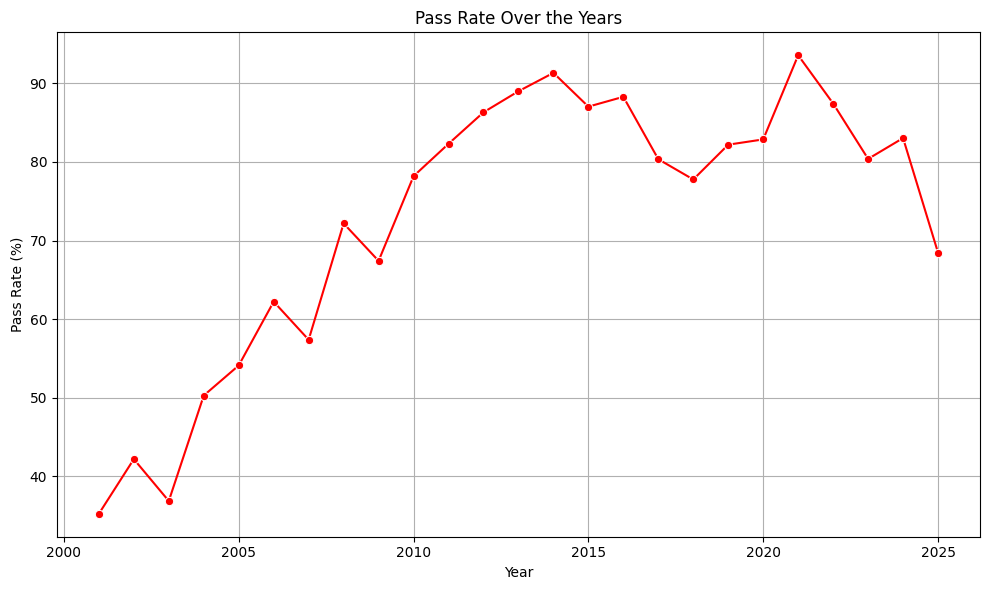

In [77]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Pass_Rate', data=df, color='red', marker='o')
plt.title('Pass Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Pass Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


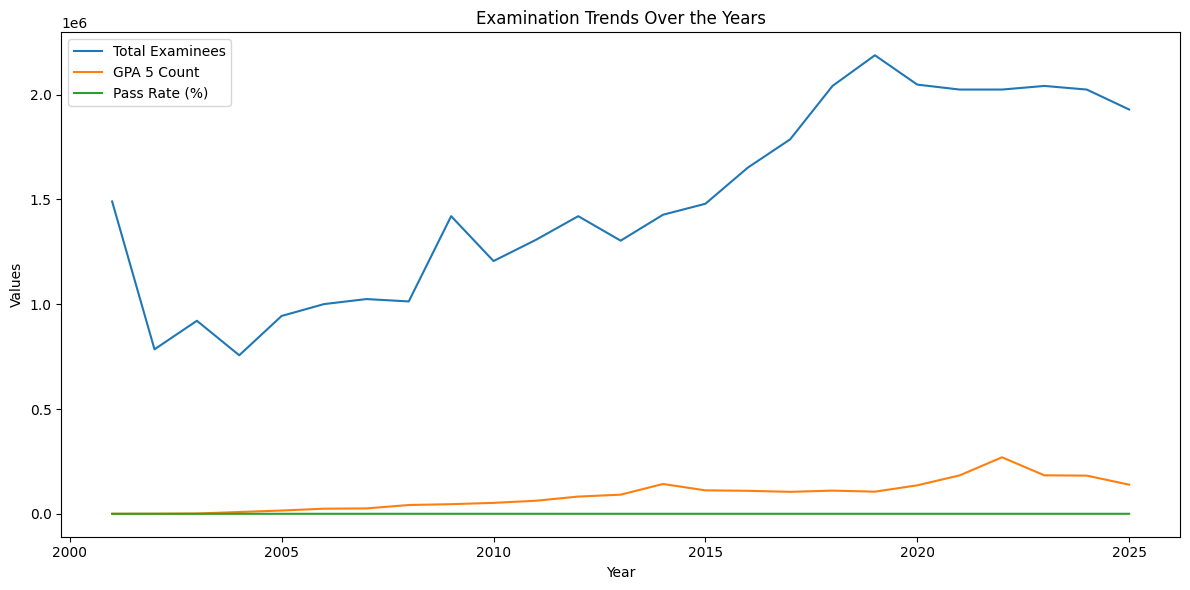

In [78]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Total_Examinees', data=df, label='Total Examinees')
sns.lineplot(x='Year', y='GPA_5_Count', data=df, label='GPA 5 Count')
sns.lineplot(x='Year', y='Pass_Rate', data=df, label='Pass Rate (%)')
plt.title('Examination Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.tight_layout()
plt.show()


The number of total examinees has steadily increased over time, peaking around 2020, which reflects growing participation in the SSC exams. GPA 5 achievers also show a rising trend, with a notable spike after 2019, indicating improvement in student performance. Meanwhile, the pass rate has remained relatively stable, suggesting consistent overall performance across years.

# Predictive Modelling

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Total_Examinees_scaled'] = scaler.fit_transform(df[['Total_Examinees']])


In [82]:
#Data selection
X = df[['Year', 'Total_Examinees', 'Pass_Rate']]
y = df['GPA_5_Count']

In [83]:
#Train-test split
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.2, random_state=0)

***Linear Regression***

In [84]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Metrics
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))  # Manually compute RMSE

# Print results
print("Linear Regression")
print("R² Score:", r2_lr)
print("RMSE:", rmse_lr)
print("Intercept (b0):", lr.intercept_)
print("Coefficients (b1):", lr.coef_)

Linear Regression
R² Score: 0.8974866784114351
RMSE: 16001.118258791583
Intercept (b0): -13302698.416146925
Coefficients (b1): [6.61254287e+03 1.68696714e-02 7.90978069e+02]


Yes, linear regression model is strong
But there is still room to reduce error (especially RMSE) using multi-feature modeling or non-linear regression.

***Random Forest Regression***

In [85]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Metrics
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))  # Fixed RMSE computation

# Print results
print("Random Forest Regressor")
print("R² Score:", r2_rf)
print("RMSE:", rmse_rf)


Random Forest Regressor
R² Score: 0.9952842966281508
RMSE: 3431.8904939843283


***Decision Tree Regression***

In [87]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Metrics
r2_dt = r2_score(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))  # Fixed RMSE computation

# Print results
print("Decision Tree Regressor")
print("R² Score:", r2_dt)
print("RMSE:", rmse_dt)

Decision Tree Regressor
R² Score: 0.9148431086661747
RMSE: 14583.779242706603


***Lasso Regression***

In [88]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

lasso = Lasso(alpha=0.1)  # You can tune alpha if needed
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Save metrics
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))  # Fixed RMSE

# Print results
print("Lasso Regression")
print("R² Score:", r2_lasso)
print("RMSE:", rmse_lasso)
print("Intercept:", lasso.intercept_)
print("Coefficients:", lasso.coef_)



Lasso Regression
R² Score: 0.8974865815718166
RMSE: 16001.125816549922
Intercept: -13302677.251189405
Coefficients: [6.61253223e+03 1.68697986e-02 7.90979217e+02]


***Ridge Regression***

In [89]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Save metrics into variables
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))  # Fixed RMSE

# Print metrics
print("Ridge Regression")
print("R² Score:", r2_ridge)
print("RMSE:", rmse_ridge)
print("Intercept:", ridge.intercept_)
print("Coefficients:", ridge.coef_)


Ridge Regression
R² Score: 0.896965900828312
RMSE: 16041.710384869875
Intercept: -13221747.847020956
Coefficients: [6.57177392e+03 1.73180531e-02 7.97208651e+02]


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Store model names and their metrics
results = {
    'Model': ['Linear', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest'],
    'R2_Score': [r2_lr, r2_ridge, r2_lasso, r2_dt, r2_rf],
    'RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_dt, rmse_rf]
}

results_df = pd.DataFrame(results)

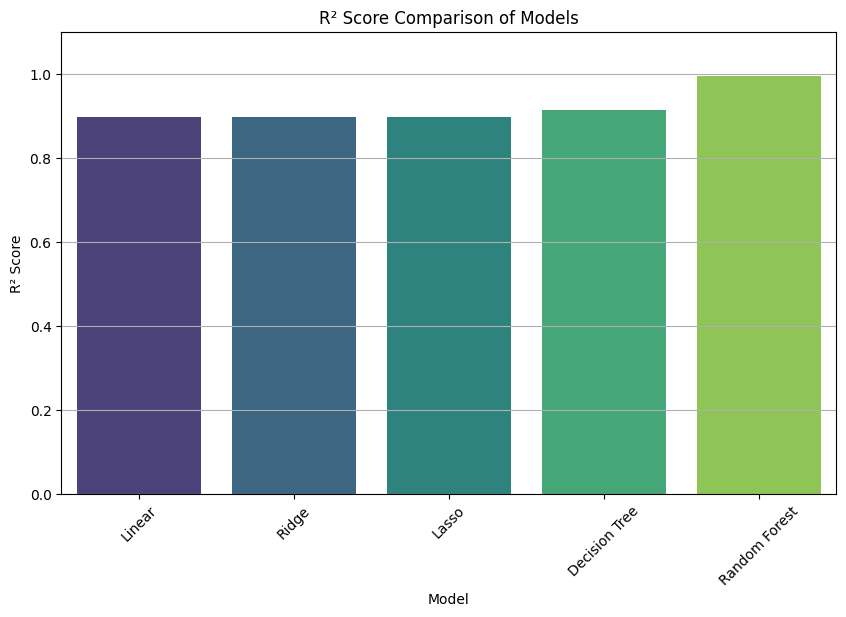

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2_Score', data=results_df, palette='viridis')
plt.title('R² Score Comparison of Models')
plt.ylabel('R² Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


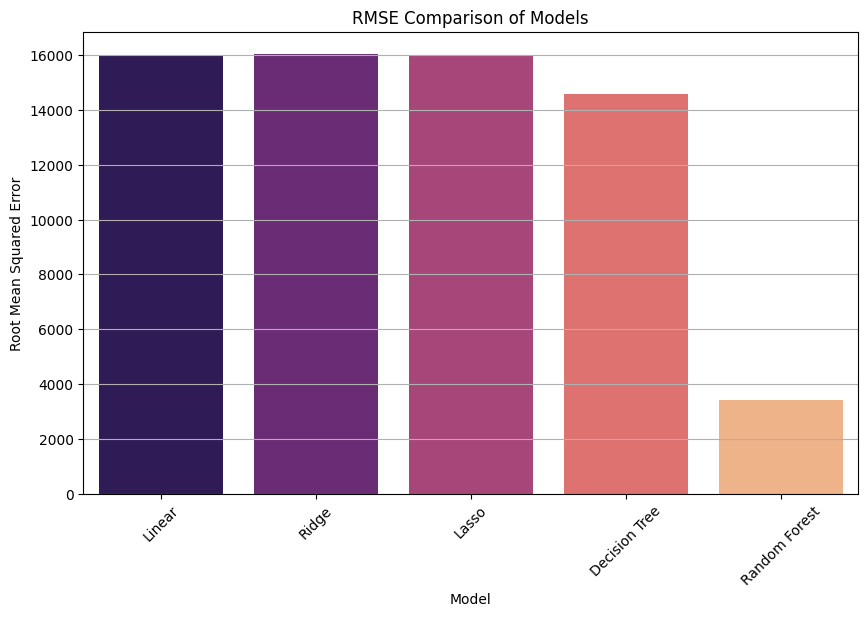

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='RMSE', data=results_df, palette='magma')
plt.title('RMSE Comparison of Models')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Best Performing Model: Random Forest
1. R² Score = 0.995 → Explains 99.5% of the variation in GPA_5_Count.
2. RMSE = 3431 → Lowest error, indicating the most accurate predictions.

# **Prediction**

In [93]:
try:
    print("\n Predict GPA_5_Count:")
    year = int(input("Enter Year: "))
    total_examinees = int(input("Enter Total Examinees: "))
    pass_rate = float(input("Enter Pass Rate (%): "))

    # Create input DataFrame
    input_data = pd.DataFrame({
        'Year': [year],
        'Total_Examinees': [total_examinees],
        'Pass_Rate': [pass_rate]
    })

    prediction = rf.predict(input_data)
    print(f"\n📊 Predicted GPA_5_Count for {year}: {int(prediction[0])}")

except Exception as e:
    print("❌ Error in input or prediction:", e)



🔮 Predict GPA_5_Count:
Enter Year: 2026
Enter Total Examinees: 65670030
Enter Pass Rate (%): 78

📊 Predicted GPA_5_Count for 2026: 174832
